In [98]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    HistGradientBoostingClassifier,
    GradientBoostingClassifier
)

from sklearn.linear_model import (SGDClassifier)

from sklearn.model_selection import cross_val_score, TimeSeriesSplit

from xgboost import XGBClassifier, XGBRFClassifier
#from xgboost import XGBClassifier, plot_tree
from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
processed = '../data/processed'
main_data = pd.read_pickle(Path(processed) / 'main_data.pkl')

In [3]:
main_data = main_data[(main_data.b_prev_G > 50)]

x_vars = [
    'spot', 'home', 'b_pred_HPPA', 'p_pred_HPAB', 'park_factor', 'year',
    'BAT_HAND', 'PIT_HAND', 'b_avg_win', 'own_p_pred_HPAB',
    'p_team_HPG', 'p_team_avg_game_score', 'rating_rating_pre',
    'rating_rating_prob', 'rating_pitcher_rgs',
    'rating_own_rating_pre', 'rating_own_pitcher_rgs'
]
y_var = ['Win']
vars = x_vars + y_var

main_data = main_data.loc[:, vars]
main_data = main_data.dropna()

train = main_data[(main_data.year < 2000) & (main_data.year >= 1960)]
test = main_data[(main_data.year >= 2000)]

train_x = train[x_vars]
train_y = train['Win'].astype('int')
test_x = test[x_vars]
test_y = test['Win'].astype('int')

In [5]:
clf = XGBClassifier(
    tree_method='hist',
    verbosity = 0,
    random_state = 0,
    eval_metric = 'auc',
    max_depth = 2,
    learning_rate = .001,
    early_stopping_rounds=5,
    n_estimators = 1000,
    subsample=.5,
#     colsample_bytree=.4,
)

In [7]:
eval_set = [(test_x, test_y)]
clf.fit(train_x, train_y, eval_metric="auc", eval_set=eval_set, verbose=True)

/Users/rsfletch/opt/anaconda3/envs/bts/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.55022
[1]	validation_0-auc:0.55181
[2]	validation_0-auc:0.55202
[3]	validation_0-auc:0.55204
[4]	validation_0-auc:0.55202
[5]	validation_0-auc:0.55202
[6]	validation_0-auc:0.55211
[7]	validation_0-auc:0.55209
[8]	validation_0-auc:0.55345
[9]	validation_0-auc:0.55345
[10]	validation_0-auc:0.55349
[11]	validation_0-auc:0.55349
[12]	validation_0-auc:0.55349
[13]	validation_0-auc:0.55351
[14]	validation_0-auc:0.55351
[15]	validation_0-auc:0.55353
[16]	validation_0-auc:0.55352
[17]	validation_0-auc:0.55351
[18]	validation_0-auc:0.55368
[19]	validation_0-auc:0.55372
[20]	validation_0-auc:0.55372
[21]	validation_0-auc:0.55373
[22]	validation_0-auc:0.55375
[23]	validation_0-auc:0.55384
[24]	validation_0-auc:0.55403
[25]	validation_0-auc:0.55415
[26]	validation_0-auc:0.55413
[27]	validation_0-auc:0.55419
[28]	validation_0-auc:0.55415
[29]	validation_0-auc:0.55417
[30]	validation_0-auc:0.55415
[31]	validation_0-auc:0.55415
[32]	validation_0-auc:0.55445
[33]	validation_0-au

[268]	validation_0-auc:0.55663
[269]	validation_0-auc:0.55664
[270]	validation_0-auc:0.55666
[271]	validation_0-auc:0.55665
[272]	validation_0-auc:0.55666
[273]	validation_0-auc:0.55667
[274]	validation_0-auc:0.55666
[275]	validation_0-auc:0.55666
[276]	validation_0-auc:0.55666
[277]	validation_0-auc:0.55666
[278]	validation_0-auc:0.55666
[279]	validation_0-auc:0.55666
[280]	validation_0-auc:0.55666
[281]	validation_0-auc:0.55667
[282]	validation_0-auc:0.55667
[283]	validation_0-auc:0.55668
[284]	validation_0-auc:0.55668
[285]	validation_0-auc:0.55682
[286]	validation_0-auc:0.55682
[287]	validation_0-auc:0.55682
[288]	validation_0-auc:0.55681
[289]	validation_0-auc:0.55682
[290]	validation_0-auc:0.55682
[291]	validation_0-auc:0.55683
[292]	validation_0-auc:0.55683
[293]	validation_0-auc:0.55683
[294]	validation_0-auc:0.55683
[295]	validation_0-auc:0.55682
[296]	validation_0-auc:0.55682
[297]	validation_0-auc:0.55683
[298]	validation_0-auc:0.55683
[299]	validation_0-auc:0.55683
[300]	va

[533]	validation_0-auc:0.55777
[534]	validation_0-auc:0.55778
[535]	validation_0-auc:0.55778
[536]	validation_0-auc:0.55778
[537]	validation_0-auc:0.55778
[538]	validation_0-auc:0.55778
[539]	validation_0-auc:0.55778
[540]	validation_0-auc:0.55778
[541]	validation_0-auc:0.55778
[542]	validation_0-auc:0.55778
[543]	validation_0-auc:0.55778
[544]	validation_0-auc:0.55778
[545]	validation_0-auc:0.55778
[546]	validation_0-auc:0.55778
[547]	validation_0-auc:0.55779
[548]	validation_0-auc:0.55779
[549]	validation_0-auc:0.55779
[550]	validation_0-auc:0.55779
[551]	validation_0-auc:0.55779
[552]	validation_0-auc:0.55779
[553]	validation_0-auc:0.55779
[554]	validation_0-auc:0.55780
[555]	validation_0-auc:0.55780
[556]	validation_0-auc:0.55780
[557]	validation_0-auc:0.55781
[558]	validation_0-auc:0.55780
[559]	validation_0-auc:0.55780
[560]	validation_0-auc:0.55780
[561]	validation_0-auc:0.55782
[562]	validation_0-auc:0.55785
[563]	validation_0-auc:0.55784
[564]	validation_0-auc:0.55785
[565]	va

[798]	validation_0-auc:0.55836
[799]	validation_0-auc:0.55836
[800]	validation_0-auc:0.55836
[801]	validation_0-auc:0.55836
[802]	validation_0-auc:0.55836
[803]	validation_0-auc:0.55836
[804]	validation_0-auc:0.55836
[805]	validation_0-auc:0.55837
[806]	validation_0-auc:0.55837
[807]	validation_0-auc:0.55837
[808]	validation_0-auc:0.55837
[809]	validation_0-auc:0.55838
[810]	validation_0-auc:0.55838
[811]	validation_0-auc:0.55838
[812]	validation_0-auc:0.55839
[813]	validation_0-auc:0.55839
[814]	validation_0-auc:0.55839
[815]	validation_0-auc:0.55840
[816]	validation_0-auc:0.55840
[817]	validation_0-auc:0.55840
[818]	validation_0-auc:0.55840
[819]	validation_0-auc:0.55840
[820]	validation_0-auc:0.55840
[821]	validation_0-auc:0.55840
[822]	validation_0-auc:0.55840
[823]	validation_0-auc:0.55840
[824]	validation_0-auc:0.55840
[825]	validation_0-auc:0.55841
[826]	validation_0-auc:0.55841
[827]	validation_0-auc:0.55841
[828]	validation_0-auc:0.55842
[829]	validation_0-auc:0.55844
[830]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='hist',
              validate_parameters=1, verbosity=0)

In [7]:
results = cross_val_score(clf, train[x_vars], train['Win'].astype('int'), cv=5, n_jobs=-1)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.65926146 0.65926146 0.49496842 0.65926146 0.34074333]
Accuracy: 56.270% (12.793%)


In [8]:
results = cross_val_score(clf, train[x_vars], train['Win'].astype('int'), cv=5, scoring='roc_auc', n_jobs=-1)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.53508822 0.41447828 0.51838171 0.44103479 0.57839566]
Accuracy: 49.748% (6.078%)


In [9]:
results = cross_val_score(clf, train[x_vars], train['Win'].astype('int'), cv=10, scoring='roc_auc', n_jobs=-1)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.53796049 0.42480881 0.33414188 0.34172228 0.54588138 0.53843072
 0.38549322 0.3247279  0.30158375 0.5582278 ]
Accuracy: 42.930% (9.992%)


<AxesSubplot:>

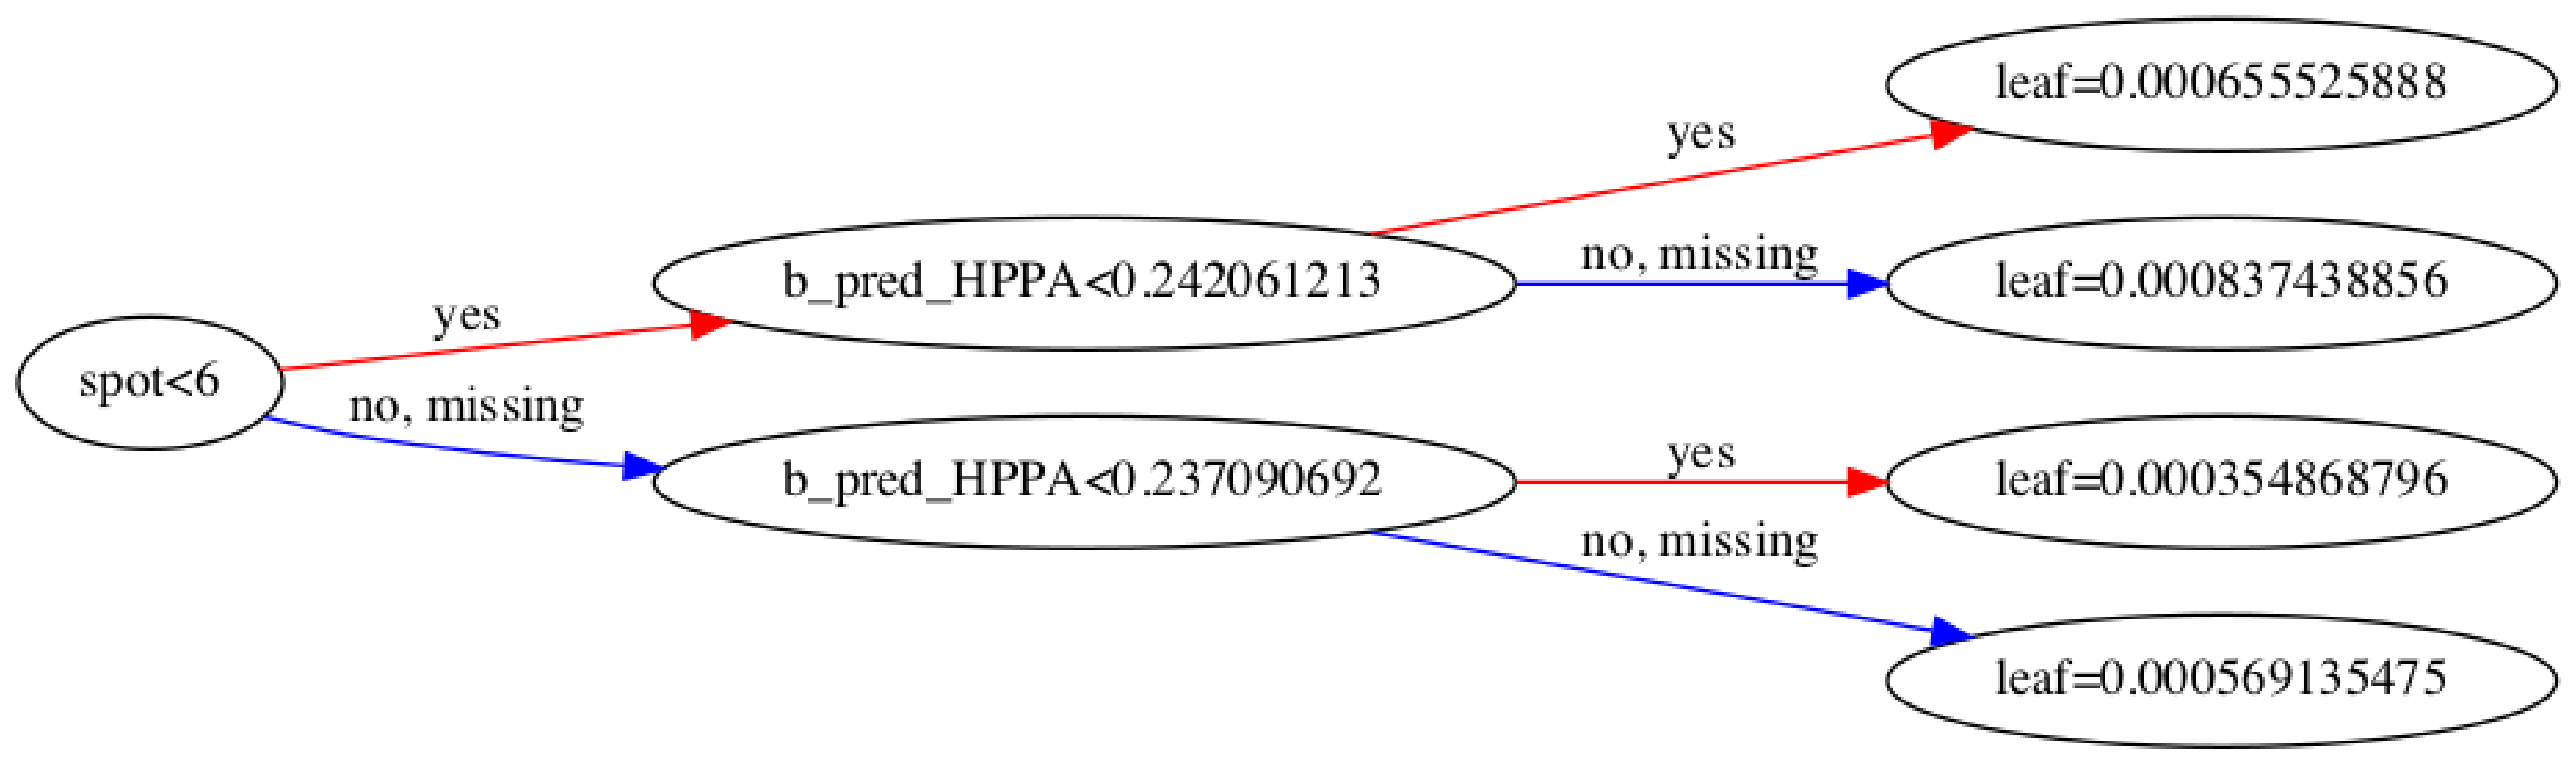

In [9]:
plot_tree(clf, num_trees=1, rankdir='LR')

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0, max_features=5)

In [63]:
results = cross_val_score(clf, train[x_vars], train['Win'].astype('int'), cv=5, n_jobs=-1, scoring='roc_auc')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

KeyboardInterrupt: 

In [ ]:
results = cross_val_score(clf, train[x_vars], train['Win'].astype('int'), cv=10, n_jobs=-1, scoring='roc_auc')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

In [44]:
clf.fit(train[x_vars], train['Win'].astype('int'))

RandomForestClassifier(max_features=2, n_estimators=30, n_jobs=-1,
                       random_state=0)

In [110]:
clf = XGBRFClassifier(
    verbosity = 1,
    random_state = 0,
    n_estimators = 1000,
)

In [111]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
results = cross_val_score(clf, train[x_vars], train['Win'].astype('int'), cv=cv, n_jobs=-1, scoring='roc_auc')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

KeyboardInterrupt: 